In [1]:
import csv
import json
import os
TOTAL_BATCHES = 113


In [2]:

data.sort(key=lambda row: row['epoch'] + (row['batch']/TOTAL_BATCHES))

normed_batches = [row['epoch'] + (row['batch']/TOTAL_BATCHES) for row in data]
print(normed_batches)


def get_col(col_name):
    return (
        [row['predictions_dist'][col_name]['guess_rate'] for row in data]
        if col_name not in data[0] else
        [row[col_name] for row in data]
    )

guesses = ['False_Pos', 'True_Pos', 'False_Neg', 'True_Neg']

total_bird = [sum([row['predictions_dist']['bird'][x] for x in guesses]) for row in data]
total_plane = [sum([row['predictions_dist']['plane'][x] for x in guesses]) for row in data]
gr_bird = [row['predictions_dist']['bird']['guess_rate'] for row in data]
gr_plane = [row['predictions_dist']['plane']['guess_rate'] for row in data]
fp_plane = [row['predictions_dist']['plane']['False_Pos'] / total for row, total in zip(data, total_plane)]
fp_bird = [row['predictions_dist']['bird']['False_Pos'] / total for row, total in zip(data, total_bird)]


NameError: name 'data' is not defined

In [2]:
import matplotlib.pyplot as plt

def plot_multiple_lines(x, y_lists, labels=None, title='Line Graph', xlabel='X-axis', ylabel='Y-axis'):
    """
    Plots multiple lines on a graph.

    Parameters:
    - x: List of x-axis values.
    - y_lists: List of lists containing y-axis values for each line.
    - labels: List of labels for each line (default is None).
    - title: Title of the graph (default is 'Line Graph').
    - xlabel: Label for the x-axis (default is 'X-axis').
    - ylabel: Label for the y-axis (default is 'Y-axis').
    """
    for i, y in enumerate(y_lists):
        label = labels[i] if labels else None
        filtered_y = [yi for yi in y if yi >= 0]
        filtered_x = [xj for yi, xj in zip(y, x) if yi >= 0]
        plt.plot(
            filtered_x,
            filtered_y,
            # marker='o',
            label=label
        )
    
    # Adding title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Adding legend if labels are provided
    if labels:
        plt.legend()
    
    # Display the graph
    plt.show()

In [3]:
def load(run_name, title=None):
    data_path = os.path.join('runs', 'detect', run_name, 'bias.jsonl')

    with open(data_path, 'r') as f:
        # headers = next(reader)
        # hd = {name: i for i, name in enumerate(headers)}
        data = []
        for row in f:
            data.append(json.loads(row))

    data.sort(key=lambda row: row['epoch'] + (row['batch']/TOTAL_BATCHES))

    normed_batches = [row['epoch'] + (row['batch']/TOTAL_BATCHES) for row in data]
    print(normed_batches)


    def get_col(col_name):
        return (
            [row['predictions_dist'][col_name]['guess_rate'] for row in data]
            if col_name not in data[0] else
            [row[col_name] for row in data]
        )

    def try_get(row, key, key2):
        return row['predictions_dist'][key][key2] if key in row['predictions_dist'] else 0

    guesses = ['False_Pos', 'True_Pos', 'False_Neg', 'True_Neg']
    print(len([row for row in data if 'plane' in row['predictions_dist']]))
    print(len([row for row in data if 'bird' in row['predictions_dist']]))
    bad_data = [row for row in data if 'plane' not in row['predictions_dist']]
    print(bad_data)
    total_bird = [
        sum([try_get(row, 'bird', x)
             for x in guesses])
        for row in data
    ]
    total_plane = [
        sum([try_get(row, 'plane', x)
             for x in guesses])
        for row in data
    ]
    gr_bird = [try_get(row, 'bird', 'guess_rate') for row in data]
    gr_plane = [try_get(row, 'plane', 'guess_rate') for row in data]
    fp_plane = [(try_get(row, 'plane', 'False_Pos') / total) if total > 0 else -1 for row, total in zip(data, total_plane)]
    fp_bird = [(try_get(row, 'bird', 'False_Pos') / total) if total > 0 else -1 for row, total in zip(data, total_bird)]
    print([(row['epoch'], row['batch']) for row in data])

    plot_multiple_lines(
        normed_batches,
        [
            gr_bird,
            gr_plane,
            # fp_bird,
            # fp_plane,
            get_col('acc')
        ],
        [
            'gr_bird',
            'gr_plane',
            # 'fp_bird',
            # 'fp_plane',
            'acc'
        ],
        title=title or 'guess rate during video classification',
        xlabel="Epoch",
        ylabel="Classification accuracy"
        )
    return data

[0.0, 0.0, 0.08849557522123894, 0.17699115044247787, 0.26548672566371684, 0.35398230088495575, 0.4424778761061947, 0.5309734513274337, 0.6194690265486725, 0.7079646017699115, 0.7964601769911505, 0.8849557522123894, 0.9734513274336283, 1.0, 1.0, 1.0884955752212389, 1.176991150442478, 1.2654867256637168, 1.3539823008849559, 1.4424778761061947, 1.5309734513274336, 1.6194690265486726, 1.7079646017699115, 1.7964601769911503, 1.8849557522123894, 1.9734513274336283, 2.0, 2.0, 2.088495575221239, 2.1769911504424777, 2.265486725663717, 2.353982300884956, 2.442477876106195, 2.5309734513274336, 2.6194690265486726, 2.7079646017699117, 2.7964601769911503, 2.8849557522123894, 2.9734513274336285, 3.0, 3.0, 3.088495575221239, 3.1769911504424777, 3.265486725663717, 3.353982300884956, 3.442477876106195, 3.5309734513274336, 3.6194690265486726, 3.7079646017699117, 3.7964601769911503, 3.8849557522123894, 3.9734513274336285, 4.0, 4.0, 4.088495575221239, 4.176991150442478, 4.265486725663717, 4.353982300884955

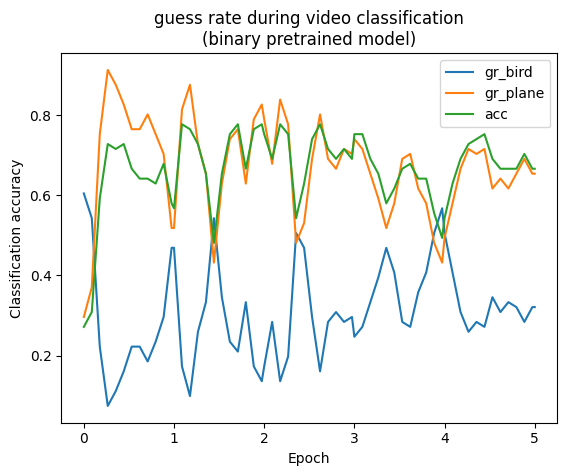

In [4]:
bin_data = load('binary_ft_checkpoints', title='guess rate during video classification\n(binary pretrained model)')

[0.0, 0.6194690265486725, 1.0, 1.6194690265486726, 2.0, 3.0, 4.0]
6
6
[{'acc': 0.09876543209876543, 'labels_dist': {'None': 12, 'bird': 8, 'plane': 61}, 'predictions_dist': {'bird': {'guess_rate': 1.0, 'True_Pos': 8, 'False_Pos': 73, 'True_Neg': 0, 'False_Neg': 0}}, 'epoch': 0, 'batch': 0}]
[(0, 0), (0, 70), (1, 0), (1, 70), (2, 0), (3, 0), (4, 0)]


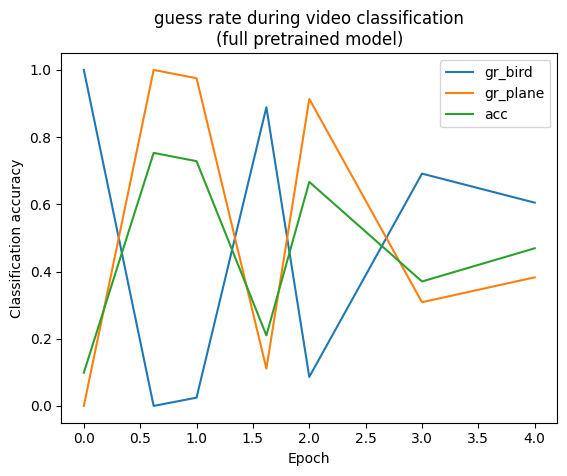

In [5]:
full_data = load('full_ft_checkpoints', title='guess rate during video classification\n(full pretrained model)')


In [6]:
from pprint import pprint

full_data_sorted = sorted(full_data, key= lambda x: x['acc'], reverse=True)
top_full_data = full_data_sorted[:20]

for row in sorted(top_full_data, key=lambda x: x['predictions_dist']['plane']['False_Pos']):
    pprint(row)



KeyError: 'plane'

In [7]:

bin_data_sorted = sorted(bin_data, key= lambda x: x['acc'], reverse=True)
top_bin_data = bin_data_sorted[:10]

for row in sorted(top_bin_data, key=lambda x: x['predictions_dist']['plane']['False_Pos']):
    pprint(row)


{'acc': 0.7777777777777778,
 'batch': 80,
 'epoch': 1,
 'labels_dist': {'None': 12, 'bird': 8, 'plane': 61},
 'predictions_dist': {'None': {'False_Neg': 11,
                               'False_Pos': 1,
                               'True_Neg': 68,
                               'True_Pos': 1,
                               'guess_rate': 0.024691358024691357},
                      'bird': {'False_Neg': 2,
                               'False_Pos': 11,
                               'True_Neg': 62,
                               'True_Pos': 6,
                               'guess_rate': 0.20987654320987653},
                      'plane': {'False_Neg': 5,
                                'False_Pos': 6,
                                'True_Neg': 14,
                                'True_Pos': 56,
                                'guess_rate': 0.7654320987654321}}}
{'acc': 0.7530864197530864,
 'batch': 70,
 'epoch': 1,
 'labels_dist': {'None': 12, 'bird': 8, 'plane': 61},
 'predictio

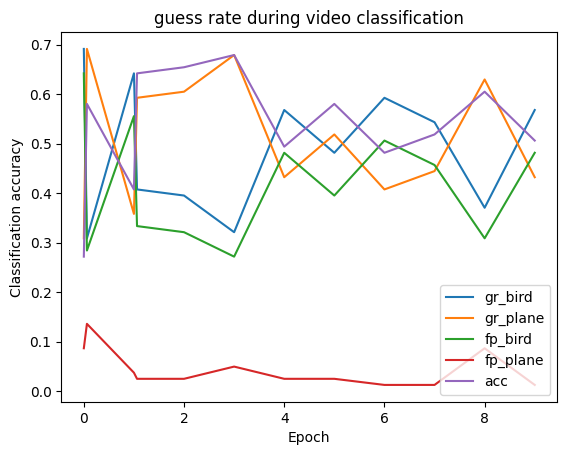

In [89]:
plot_multiple_lines(
    normed_batches,
    [
        gr_bird,
        gr_plane,
        fp_bird,
        fp_plane,
        get_col('acc')
    ],
    [
        'gr_bird',
        'gr_plane',
        'fp_bird',
        'fp_plane',
        'acc'
    ],
    title='guess rate during video classification',
    xlabel="Epoch",
    ylabel="Classification accuracy"
    )

In [1]:
"st"

'st'